# Jupyter Data Science Workflow

## From exploratory analysis to reproducible science

*Notes follow the YouTube videos by Jake VanderPlas*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
import os
from urllib.request import urlretrieve

import pandas as pd

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='Fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(URL, filename)
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    data.columns = ['Total', 'West', 'East']
    return data
    

In [3]:
data = get_fremont_data()
data.head()

,Total,West,East
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


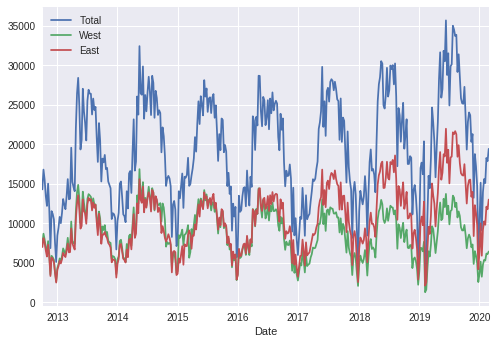

In [4]:
data.resample('W').sum().plot();

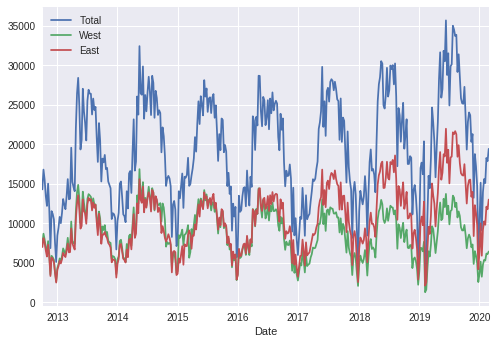

In [5]:
data.resample('W').sum().plot();

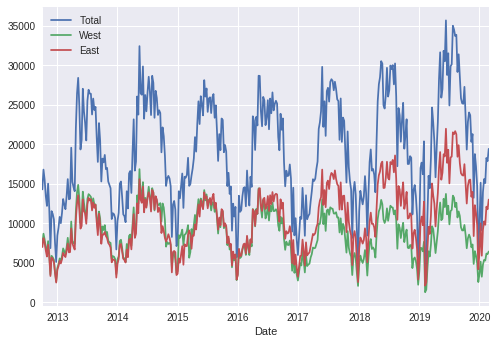

In [6]:
data.resample('W').sum().plot();

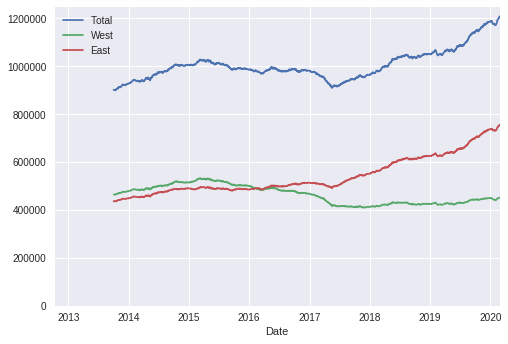

In [8]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

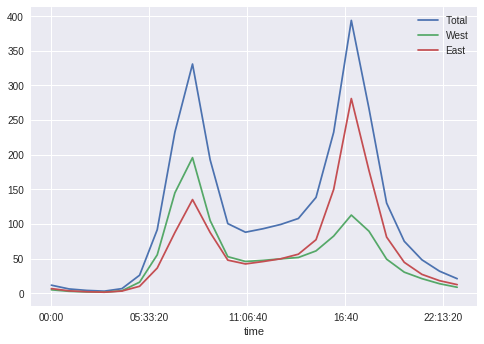

In [9]:
# see trend within day, averaging the data
# peaks indicate when people conmute
data.groupby(data.index.time).mean().plot();

In [10]:
# See whole data set in this way
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


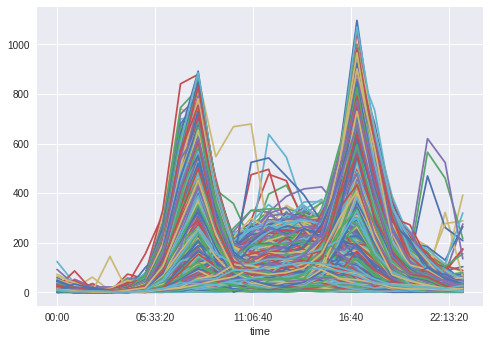

In [11]:
pivoted.plot(legend=False);

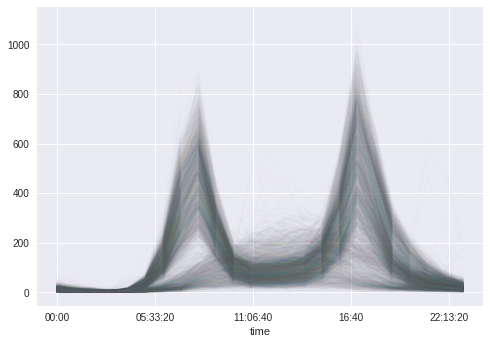

In [12]:
pivoted.plot(legend=False, alpha=0.01);

# GitHub

### Go to github, create a repository, say JupyterWorkflow.

### Then go to "clone/download" and get the string that appears

### In the local computer, type in a terminal (

git clone https://github.com/miguelpereztorres/JupyterWorkflow.git

### This will create directory  JupiterWorkflow. Move now your jupyter book there

mv JupyterWorkflow.ipynb JupyterWorkflow/

cd JupyterWorkflow

### Configure user.email and user.name in git 

git config --global user.email torres@iaa.es
git config --global user.name miguelpereztorres

### Now add your notebook directory to git

git add JupyterWorkflow.ipynb

git commit -m "Add initial analysis notebook" 

git push origin master

### You can go to github, reload the page, and see that indeed the notebook is there
### Now, I can check the status locally

git status

